In [2]:
import pandas as pd
import gzip
import time
# # Install a few python packages using pip
# from common import utils
# utils.require_package('nltk')
# utils.require_package("wget")      # for fetching dataset

In [3]:
# Standard python helper libraries.
from __future__ import print_function
from __future__ import division
import os, sys, time
import collections
from collections import Counter
import itertools

# Numerical manipulation libraries.
import numpy as np

#Visualization
import matplotlib
%matplotlib inline

# NLTK is the Natural Language Toolkit, and contains several language datasets
# as well as implementations of many popular NLP algorithms.
# HINT: You should look at what is available here when thinking about your project!


In [4]:
import nltk

In [5]:
import spacy

In [6]:
def parse(path):
  print('start parse')
  start_parse = time.time()
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)
  end_parse = time.time()
  print('end parse with time for parse',end_parse - start_parse)

def getDF(path):
  print('start getDF')
  start = time.time()
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  print('end getDF')
  end = time.time()
  print('time taken to load data = ',end-start)
  return pd.DataFrame.from_dict(df, orient='index')
df = getDF('reviews_Toys_and_Games.json.gz')

start getDF
start parse
end parse with time for parse 104.25283622741699
end getDF
time taken to load data =  104.26106595993042


In [9]:
print(df.shape)
print(df.columns)
df.head(10)

(2252771, 9)
Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AMEVO2LY6VEJA,0000191639,Nicole Soeder,"[0, 0]","Great product, thank you! Our son loved the pu...",5.0,Puzzles,1388016000,"12 26, 2013"
1,A3C9CSW3TJITGT,0005069491,Renee,"[0, 0]",I love these felt nursery rhyme characters and...,4.0,Charming characters but busy work required,1377561600,"08 27, 2013"
2,A31POTIYCKSZ9G,0076561046,So CA Teacher,"[0, 0]",I see no directions for its use. Therefore I h...,3.0,No directions for use...,1404864000,"07 9, 2014"
3,A2GGHHME9B6W4O,0131358936,Dalilah G.,"[0, 0]",This is a great tool for any teacher using the...,5.0,Great CD-ROM,1382400000,"10 22, 2013"
4,A1FSLDH43ORWZP,0133642984,Dayna English,"[0, 0]",Although not as streamlined as the Algebra I m...,5.0,Algebra II -- presentation materials,1374278400,"07 20, 2013"
5,A3NXHTSEBX9YHB,0279515766,marlenetbueras,"[0, 0]",i am glad to get it after 25 yr of waiting for...,5.0,my strawberry shortcake,1363564800,"03 18, 2013"
6,AYVR1MQCTNU5D,0375829695,annie,"[0, 0]",What a great theme for a puzzle book. My daugh...,5.0,So cute!!,1291939200,"12 10, 2010"
7,A3CJHKFHHQJP2K,0375829695,"Beth Sharo ""bookmom""","[0, 0]",My son got this book for his birthday. He lov...,1.0,Disappointing Puzzle Book,1297209600,"02 9, 2011"
8,A3638FINP26E8N,0375829695,C. Boykin,"[1, 1]",Love the book format. My 4yr old grandson love...,3.0,frustrating puzzle pieces,1282521600,"08 23, 2010"
9,AUT7723O49VMN,0375829695,Cindy Lindy,"[1, 1]",I'm a 2nd grade teacher. My students found th...,4.0,challenging and fun,1237766400,"03 23, 2009"


In [10]:
print(df.groupby('overall').count())

         reviewerID     asin  reviewerName  helpful  reviewText  summary  \
overall                                                                    
1.0          192993   192993        192435   192993      192993   192993   
2.0          115801   115801        115416   115801      115801   115801   
3.0          193941   193941        193195   193941      193941   193941   
4.0          407884   407884        406255   407884      407884   407884   
5.0         1342152  1342152       1333623  1342152     1342152  1342152   

         unixReviewTime  reviewTime  
overall                              
1.0              192993      192993  
2.0              115801      115801  
3.0              193941      193941  
4.0              407884      407884  
5.0             1342152     1342152  


In [7]:
for i in range(10):
    print(df['reviewerID'].iloc[i])
    print(df['reviewText'].iloc[i])

AMEVO2LY6VEJA
Great product, thank you! Our son loved the puzzles.  They have large pieces yet they are still challenging for a 4 year old.
A3C9CSW3TJITGT
I love these felt nursery rhyme characters and scenes.  The quality of the felt is good, and the illustrations are detailed and pretty.  As noted, the figures and scenes are printed on 2 large sheets of flannel and each individual item needs to be cut out.  This process took me 2 hours of tiny cutting.  To me it does not lend itself to a book form but rather laying out the scenes separately or for use on a flannel board.  However, I love the quiet play it offers for my toddler, and as a former Kindergarten teacher, I understand the value of learning rhyme and its connection to future reading.  Overall, delightful product with some work involved.
A31POTIYCKSZ9G
I see no directions for its use. Therefore I have to make up the games, unfortunately.
A2GGHHME9B6W4O
This is a great tool for any teacher using the Pre Calculus Enhanced with 

In [7]:
#Number of reviews by product
cntByProduct = df[['asin','reviewText']].groupby('asin').agg('count')

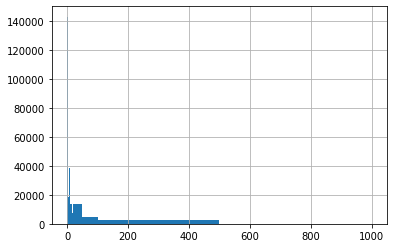

In [12]:
cntByProduct['reviewText'].hist(bins = [0,1,2,3,4,5,10,15,20,50,100,500,1000])

In [9]:
#Number of products
cntByProduct.shape

(327698, 1)

In [10]:
#counts of products with minimum number of reviews, and corresponding count of reviews
for i in range(10):
    print("Number of products with more than",i,'reviews:',cntByProduct[cntByProduct['reviewText'] > i].shape[0])
    print("total number of rows:",cntByProduct[cntByProduct['reviewText'] > i]['reviewText'].sum())

Number of products with more than 0 reviews: 327698
total number of rows: 2252771
Number of products with more than 1 reviews: 184426
total number of rows: 2109499
Number of products with more than 2 reviews: 128788
total number of rows: 1998223
Number of products with more than 3 reviews: 99428
total number of rows: 1910143
Number of products with more than 4 reviews: 81232
total number of rows: 1837359
Number of products with more than 5 reviews: 68782
total number of rows: 1775109
Number of products with more than 6 reviews: 59645
total number of rows: 1720287
Number of products with more than 7 reviews: 52626
total number of rows: 1671154
Number of products with more than 8 reviews: 47011
total number of rows: 1626234
Number of products with more than 9 reviews: 42458
total number of rows: 1585257


In [8]:
#Pulling out a dataframe of products with at least 5 reviews
df5 = df[df['asin'].isin(cntByProduct[cntByProduct['reviewText'] >= 5].index.tolist())]
print(df5.shape)

(1837359, 9)


In [9]:
cntByUser = df5[['reviewerID','reviewText']].groupby('reviewerID').agg('count')

In [13]:
cntByUser.sort_values('reviewText', ascending = False).head()

,reviewText
reviewerID,
AJGU56YG8G1DQ,1112
A2WW57XX2UVLM6,322
A2KLFJ0GHM3NFO,251
A1Z54EM24Y40LL,247
A1M8AYAL3L8ACP,244


In [17]:
df55 = df5[df5['reviewerID'].isin(cntByUser[cntByUser['reviewText'] >= 5].index.tolist())]

In [18]:
df55.shape

(359562, 9)

In [25]:
print('number of products in total review set', cntByProduct.shape[0])
a = df5.groupby('asin').agg('count')
print('number of products with at least 5 reviews for a product', a.shape[0])
a = df55.groupby('asin').agg('count')
print('number of products with at least 5 reviews for a product and user', a.shape[0])

print('number of original reviews',df.shape[0])
print('number of reviews when we limit to at least 5 reviews for a product', df5.shape[0])
print('number of reviews when we limit to at least 5 reviews for a user and product',df55.shape[0])

number of products in total review set 327698
number of products with at least 5 reviews for a product 81232
number of products with at least 5 reviews for a product and user 65075
number of original reviews 2252771
number of reviews when we limit to at least 5 reviews for a product 1837359
number of reviews when we limit to at least 5 reviews for a user and product 359562


In [20]:
df55.to_csv('toys_and_games_55.csv')

In [34]:
df.dtypes

reviewerID                object
asin                      object
reviewerName              object
helpful                   object
reviewText                object
overall                  float64
summary                   object
unixReviewTime             int64
reviewTime        datetime64[ns]
dtype: object

In [33]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

In [46]:
df['yrmth'] = df['reviewTime'].dt.year*100+df['reviewTime'].dt.month

In [61]:
l = df.groupby('yrmth').agg('count')

In [66]:
totalReviews = df.shape[0]
totalReviews*0.2

450554.2

In [83]:
m = l.sort_values('yrmth', ascending = False).cumsum()/totalReviews
m.head(15)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
yrmth,,,,,,,,,
201407,0.024005,0.024005,0.021819,0.024005,0.024005,0.024005,0.024005,0.024005,0.024005
201406,0.052034,0.052034,0.049794,0.052034,0.052034,0.052034,0.052034,0.052034,0.052034
201405,0.079251,0.079251,0.076962,0.079251,0.079251,0.079251,0.079251,0.079251,0.079251
201404,0.107217,0.107217,0.104871,0.107217,0.107217,0.107217,0.107217,0.107217,0.107217
201403,0.140447,0.140447,0.138055,0.140447,0.140447,0.140447,0.140447,0.140447,0.140447
201402,0.176581,0.176581,0.174130,0.176581,0.176581,0.176581,0.176581,0.176581,0.176581
201401,0.249523,0.249523,0.246921,0.249523,0.249523,0.249523,0.249523,0.249523,0.249523
201312,0.304083,0.304083,0.301367,0.304083,0.304083,0.304083,0.304083,0.304083,0.304083
201311,0.329729,0.329729,0.326955,0.329729,0.329729,0.329729,0.329729,0.329729,0.329729


In [98]:
df[df['reviewTime'] >= '2014-02-01'].shape

(397797, 10)

In [99]:
df[(df['reviewTime'] >= '2013-08-01') & (df['reviewTime'] < '2014-02-01')].shape

(507243, 10)

#### Creating a train, dev and test set

In [100]:
dftrain = df[df['reviewTime'] < '2013-08-01']
print('number of reviews in train set',dftrain.shape)
dfdev = df[(df['reviewTime'] >= '2013-08-01') & (df['reviewTime'] < '2014-02-01')]
print('number of reviews in dev set',dfdev.shape)
dftest = df[df['reviewTime'] >= '2014-02-01']
print('number of reviews in test set',dftest.shape)

number of reviews in train set (1347731, 10)
number of reviews in dev set (507243, 10)
number of reviews in test set (397797, 10)


In [101]:
#### Creating a subset from train with at least 5 reviews per product, and at least 5 reviews per user

dftrainCntP = dftrain[['asin','reviewText']].groupby('asin').agg('count')
print('Number of products in train set',dftrainCntP.shape[0])
dftrain5 = dftrain[dftrain['asin'].isin(dftrainCntP[dftrainCntP['reviewText'] >= 5].index.tolist())]
a = dftrain5.groupby('asin').agg('count')
print('number of products remaining after controlling for at least 5 reviews per product',a.shape[0])
dftrainCntU = dftrain5[['reviewerID','reviewText']].groupby('reviewerID').agg('count')
dftrain55 = dftrain5[dftrain5['reviewerID'].isin(dftrainCntU[dftrainCntU['reviewText'] >= 5].index.tolist())]
a = dftrain55.groupby('asin').agg('count')
print('number of products remaining after controlling for at least 5 reviews per product and user',a.shape[0])
print('number of reviews in train set',dftrain.shape[0])
print('number of reviews remaining in train set after controlling for at least 5 reviews per product',dftrain5.shape[0])
print('number of reviews remaining after controlling for at least 5 reviews per product and user',dftrain55.shape[0])

dfdev5 = dfdev[dfdev['asin'].isin(dftrainCntP[dftrainCntP['reviewText'] >= 5].index.tolist())]
print(dfdev5.shape[0])
dfdev55 = dfdev5[dfdev5['reviewerID'].isin(dftrainCntU[dftrainCntU['reviewText'] >= 5].index.tolist())]
print(dfdev55.shape[0])

Number of products in train set 236339
number of products remaining after controlling for at least 5 reviews per product 54059
number of products remaining after controlling for at least 5 reviews per product and user 39873
number of reviews in train set 1347731
number of reviews remaining in train set after controlling for at least 5 reviews per product 1043890
number of reviews remaining after controlling for at least 5 reviews per product and user 168791
297613
12763


In [104]:
dftrandd = pd.concat([dftrain,dfdev])

In [108]:
dftranddCntP = dftrandd[['asin','reviewText']].groupby('asin').agg('count')
print('Number of products in train set',dftrainCntP.shape[0])
dftrandd5 = dftrandd[dftrandd['asin'].isin(dftranddCntP[dftranddCntP['reviewText'] >= 5].index.tolist())]
a = dftrandd5.groupby('asin').agg('count')
print('number of products remaining after controlling for at least 5 reviews per product',a.shape[0])
dftranddCntU = dftrandd5[['reviewerID','reviewText']].groupby('reviewerID').agg('count')
dftrandd55 = dftrandd5[dftrandd5['reviewerID'].isin(dftranddCntU[dftranddCntU['reviewText'] >= 5].index.tolist())]
a = dftrandd55.groupby('asin').agg('count')
print('number of products remaining after controlling for at least 5 reviews per product and user',a.shape[0])

dftest5 = dftest[dftest['asin'].isin(dftranddCntP[dftranddCntP['reviewText'] >= 5].index.tolist())]
print(dftest5.shape[0])
dftest55 = dftest5[dftest5['reviewerID'].isin(dftranddCntU[dftranddCntU['reviewText'] >= 5].index.tolist())]
print(dftest55.shape[0])

Number of products in train set 236339
number of products remaining after controlling for at least 5 reviews per product 69327
number of products remaining after controlling for at least 5 reviews per product and user 54045
262293
14952


In [94]:
dftrainCntP = dftrain[['asin','reviewText']].groupby('asin').agg('count')
print('Number of products in train set',dftrainCntP.shape[0])
dftrain4 = dftrain[dftrain['asin'].isin(dftrainCntP[dftrainCntP['reviewText'] >= 4].index.tolist())]
a = dftrain4.groupby('asin').agg('count')
print('number of products remaining after controlling for at least 4 reviews per product',a.shape[0])
dftrainCntU = dftrain4[['reviewerID','reviewText']].groupby('reviewerID').agg('count')
dftrain44 = dftrain4[dftrain4['reviewerID'].isin(dftrainCntU[dftrainCntU['reviewText'] >= 4].index.tolist())]
a = dftrain44.groupby('asin').agg('count')
print('number of products remaining after controlling for at least 4 reviews per product and user',a.shape[0])
print('number of reviews in train set',dftrain.shape[0])
print('number of reviews remaining after controlling for at least 4 reviews per product',dftrain4.shape[0])
print('number of reviews remaining after controlling for at least 4 reviews per product and user',dftrain44.shape[0])

Number of products in train set 249656
number of products remaining after controlling for at least 4 reviews per product 71212
number of products remaining after controlling for at least 4 reviews per product and user 55835
number of reviews in train set 1452842
number of reviews remaining after controlling for at least 4 reviews per product 1187120
number of reviews remaining after controlling for at least 4 reviews per product and user 265274


In [111]:
dfdev4 = dfdev[dfdev['asin'].isin(dftrainCntP[dftrainCntP['reviewText'] >= 4].index.tolist())]
print(dfdev4.shape[0])
dfdev44 = dfdev4[dfdev4['reviewerID'].isin(dftrainCntU[dftrainCntU['reviewText'] >= 4].index.tolist())]
print(dfdev44.shape[0])

311587
17290


In [109]:
dftrain55.to_csv('toys_and_games_55_train.csv')

In [110]:
dfdev55.to_csv('toys_and_games_55_dev.csv')

In [112]:
dftrain44.to_csv('toys_and_games_44_train.csv')

In [113]:
dfdev44.to_csv('toys_and_games_44_dev.csv')

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [15]:
# One of these needs to be downloaded for pos to work
nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_treebank_pos_tagger')

# This needed to be downloaded for lemmatizer. There may be other options - have not explored yet.
nltk.download("WordNet")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Arunima\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Error loading WordNet: Package 'WordNet' not found in
[nltk_data]     index


False

In [14]:
df5.head(15)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
6,AYVR1MQCTNU5D,0375829695,annie,"[0, 0]",What a great theme for a puzzle book. My daugh...,5.0,So cute!!,1291939200,"12 10, 2010"
7,A3CJHKFHHQJP2K,0375829695,"Beth Sharo ""bookmom""","[0, 0]",My son got this book for his birthday. He lov...,1.0,Disappointing Puzzle Book,1297209600,"02 9, 2011"
8,A3638FINP26E8N,0375829695,C. Boykin,"[1, 1]",Love the book format. My 4yr old grandson love...,3.0,frustrating puzzle pieces,1282521600,"08 23, 2010"
9,AUT7723O49VMN,0375829695,Cindy Lindy,"[1, 1]",I'm a 2nd grade teacher. My students found th...,4.0,challenging and fun,1237766400,"03 23, 2009"
10,A27GZ92KLXDJVJ,0375829695,D. Glade,"[1, 1]",This puzzle is poorly made. The picture part ...,2.0,Cheaply made puzzle - not worth your $!,1264550400,"01 27, 2010"
11,A1QG5NJW3LOTSO,0375829695,H. Chao,"[0, 0]",On the plus side - puzzle book format and deli...,3.0,mixed feelings,1201564800,"01 29, 2008"
12,A2R5OO04DXXGZ2,0375829695,Jack Bowdoin,"[0, 0]",Nephew and Niece loved these! Highly recommend...,5.0,Great Puzzle!,1354665600,"12 5, 2012"
13,A11TL78PNBS336,0375829695,"L. Vickers ""lcvickers""","[0, 0]","If you have a child who loves Dr. Suess, and l...",4.0,Big book of puzzles!,1292198400,"12 13, 2010"
14,A2WR3MP7IGOFBO,0375829695,M. Jimenez,"[0, 0]",Very cute. I liked that each of the puzzle fra...,5.0,Cute,1399852800,"05 12, 2014"
19,A2BK2H5ZEB4H2Z,0439028485,Alicia Pearson,"[0, 0]","Bought this form my nephew age 2, He loved cli...",4.0,Clifford stacking blocks,1324425600,"12 21, 2011"


In [16]:
#Trial of using pos_tag on one specific review

review = df5.loc[7,'reviewText']
print(review)
tags = nltk.pos_tag(word_tokenize(review))
print(tags)

print('Printing all adjectives')
for i,pair in enumerate(tags):
    if pair[1] == 'JJ':
        print('adjective:',pair[0])
        
        #Can we find the noun corresponding to the adjective assuming the noun came after the adjective
        if ('NN' in tags[i+1][1]):
            print('corresponding noun:',tags[i+1][0])
        
        
print('\nPrinting all nouns')
for word,tag in tags:
    if ('NN' in tag):
        print(word)

My son got this book for his birthday.  He loves puzzles and Dr. Seuss and I felt that this would be a winning combination.  The pieces are all the same shape and can easily be put together in the wrong place.  I worked with him to complete the puzzle and found it frustrating as an adult.  I would not recommend this book to anyone.
[('My', 'PRP$'), ('son', 'NN'), ('got', 'VBD'), ('this', 'DT'), ('book', 'NN'), ('for', 'IN'), ('his', 'PRP$'), ('birthday', 'NN'), ('.', '.'), ('He', 'PRP'), ('loves', 'VBZ'), ('puzzles', 'NNS'), ('and', 'CC'), ('Dr.', 'NNP'), ('Seuss', 'NNP'), ('and', 'CC'), ('I', 'PRP'), ('felt', 'VBD'), ('that', 'IN'), ('this', 'DT'), ('would', 'MD'), ('be', 'VB'), ('a', 'DT'), ('winning', 'JJ'), ('combination', 'NN'), ('.', '.'), ('The', 'DT'), ('pieces', 'NNS'), ('are', 'VBP'), ('all', 'PDT'), ('the', 'DT'), ('same', 'JJ'), ('shape', 'NN'), ('and', 'CC'), ('can', 'MD'), ('easily', 'RB'), ('be', 'VB'), ('put', 'VBN'), ('together', 'RB'), ('in', 'IN'), ('the', 'DT'), ('w

In [17]:
# Stemming vs Lemmatizing
#Sample comparing the output of the two

from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
ps = PorterStemmer()
stemmedReview = []
lemmedReview = []
review = df.loc[6,'reviewText']
for word in word_tokenize(review):
    stemmedReview.append(ps.stem(word))
    lemmedReview.append(lem.lemmatize(word,"v"))
print('Original review \n', review)
print('Stemmed review \n',stemmedReview)
print('Lemmatized review \n',lemmedReview)

# Lemmatizing works better in keeping the sense of the word.

Original review 
 What a great theme for a puzzle book. My daughter loves both Dr. Seuss AND puzzle books, so this was a hit!
Stemmed review 
 ['what', 'a', 'great', 'theme', 'for', 'a', 'puzzl', 'book', '.', 'My', 'daughter', 'love', 'both', 'dr.', 'seuss', 'and', 'puzzl', 'book', ',', 'so', 'thi', 'wa', 'a', 'hit', '!']
Lemmatized review 
 ['What', 'a', 'great', 'theme', 'for', 'a', 'puzzle', 'book', '.', 'My', 'daughter', 'love', 'both', 'Dr.', 'Seuss', 'AND', 'puzzle', 'book', ',', 'so', 'this', 'be', 'a', 'hit', '!']


In [18]:
df1prod = df[df['asin'] == '0375829695']
df1prod.shape

(9, 9)

In [19]:
# Doing the lemmatizing and pos_tag for all reviews for a product. 
# And then a frequency count of all the words that are nouns and adjectives (this is a semi-informed choice. Can potentially be improved)

goodWords = []
for review in df1prod['reviewText']:
    print(review)
    lem = WordNetLemmatizer()
    lemmedReview = []
    for word in word_tokenize(review):
        lemmedReview.append(lem.lemmatize(word,"v")) # v here is part of speech. The lemmatizer should probably come after the pos_tag, so appropriate pos can be used. 
        #Before we do that, need to map the tags from pos_tag to the tags that lemmatizer takes. TIll then, 'v' is working fine.
    print(lemmedReview)
    
    tags = nltk.pos_tag(lemmedReview)
    print(tags)
    
    print('\nPrinting all nouns and adjectives')
    for word,tag in tags:
        if ('NN' in tag) | ('JJ' in tag): #Using 'NN' in tag allows us to include NN, NNP, NNS - which are some variations of NN.
            print(word)
            goodWords.append(word)
            
    print('Printing all adjectives')
    for i,pair in enumerate(tags):
        if pair[1] == 'JJ':
            print('adjective:',pair[0])
            #Assuming the noun came after the adjective
            if ('NN' in tags[i+1][1]):
                print('corresponding noun:',tags[i+1][0])

What a great theme for a puzzle book. My daughter loves both Dr. Seuss AND puzzle books, so this was a hit!
['What', 'a', 'great', 'theme', 'for', 'a', 'puzzle', 'book', '.', 'My', 'daughter', 'love', 'both', 'Dr.', 'Seuss', 'AND', 'puzzle', 'book', ',', 'so', 'this', 'be', 'a', 'hit', '!']
[('What', 'WP'), ('a', 'DT'), ('great', 'JJ'), ('theme', 'NN'), ('for', 'IN'), ('a', 'DT'), ('puzzle', 'NN'), ('book', 'NN'), ('.', '.'), ('My', 'PRP$'), ('daughter', 'NN'), ('love', 'VB'), ('both', 'DT'), ('Dr.', 'NNP'), ('Seuss', 'NNP'), ('AND', 'NNP'), ('puzzle', 'NN'), ('book', 'NN'), (',', ','), ('so', 'IN'), ('this', 'DT'), ('be', 'VB'), ('a', 'DT'), ('hit', 'NN'), ('!', '.')]

Printing all nouns and adjectives
great
theme
puzzle
book
daughter
Dr.
Seuss
AND
puzzle
book
hit
Printing all adjectives
adjective: great
corresponding noun: theme
My son got this book for his birthday.  He loves puzzles and Dr. Seuss and I felt that this would be a winning combination.  The pieces are all the same shap

[('Very', 'RB'), ('cute', 'JJ'), ('.', '.'), ('I', 'PRP'), ('like', 'VBP'), ('that', 'IN'), ('each', 'DT'), ('of', 'IN'), ('the', 'DT'), ('puzzle', 'NN'), ('frame', 'NN'), ('have', 'VBP'), ('their', 'PRP$'), ('own', 'JJ'), ('background', 'NN'), ('color', 'NN'), ('that', 'IN'), ('correspond', 'NN'), ('with', 'IN'), ('the', 'DT'), ('back', 'NN'), ('of', 'IN'), ('the', 'DT'), ('puzzle', 'NN'), ('piece', 'NN'), (',', ','), ('Makes', 'NNP'), ('be', 'VB'), ('so', 'RB'), ('easy', 'JJ'), ('to', 'TO'), ('sort', 'VB'), ('if', 'IN'), ('your', 'PRP$'), ('child', 'NN'), ('happen', 'VB'), ('to', 'TO'), ('take', 'VB'), ('out', 'RP'), ('piece', 'NN'), ('from', 'IN'), ('all', 'DT'), ('of', 'IN'), ('the', 'DT'), ('puzzle', 'NN')]

Printing all nouns and adjectives
cute
puzzle
frame
own
background
color
correspond
back
puzzle
piece
Makes
easy
child
piece
puzzle
Printing all adjectives
adjective: cute
adjective: own
corresponding noun: background
adjective: easy


In [20]:
#Highest frequency words picked from the reviews

from collections import Counter
a = Counter(goodWords)
a.most_common(10)

[('puzzle', 18),
 ('book', 8),
 ('piece', 7),
 ('Dr.', 6),
 ('Seuss', 6),
 ('same', 3),
 ('children', 3),
 ('picture', 3),
 ('great', 2),
 ('son', 2)]

In [21]:
#Function to Find highest frequency words for a specific product

def freqFeatures(pid,numWords,boolPrint):
    df1prod = df[df['asin'] == pid]
    df1prod.shape
    goodWords = []
    for review in df1prod['reviewText']:
        if boolPrint:
            print(review)
        lem = WordNetLemmatizer()
        lemmedReview = []
        for word in word_tokenize(review):
            lemmedReview.append(lem.lemmatize(word,"v")) # v here is part of speech. The lemmatizer should probably come after the pos_tag, so appropriate pos can be used. 
            #Before we do that, need to map the tags from pos_tag to the tags that lemmatizer takes. TIll then, 'v' is working fine.
        if boolPrint:
            print(lemmedReview)

        tags = nltk.pos_tag(lemmedReview)
        if boolPrint:
            print(tags)

        for word,tag in tags:
            if ('NN' in tag) | ('JJ' in tag): #Using 'NN' in tag allows us to include NN, NNP, NNS - which are some variations of NN.
                goodWords.append(word)
                
    print(goodWords)

    a = Counter(goodWords)
    return(a.most_common(numWords))

In [22]:
freqFeatures('0375829695',10,0)

['great', 'theme', 'puzzle', 'book', 'daughter', 'Dr.', 'Seuss', 'AND', 'puzzle', 'book', 'hit', 'son', 'book', 'birthday', 'puzzle', 'Dr.', 'Seuss', 'win', 'combination', 'piece', 'same', 'shape', 'wrong', 'place', 'puzzle', 'adult', 'book', 'anyone', 'book', 'format', 'old', 'grandson', 'puzzle', 'Dr.', 'Seuss', 'add', 'plus', 'BUT', 'several', 'piece', 'same', 'unnecessary', 'confusion', 'frustration', 'grade', 'teacher', 'students', 'jigsaw', 'puzzle', 'book', 'challenge', 'fun', 'cut', 'more', 'puzzle', 'time', 'great', 'activity', 'children', 'work', 'class', 'celebrate', 'Dr.', 'Seuss', 'Birthday', 'puzzle', 'picture', 'part', 'puzzle', 'piece', 'pop', 'back', 'review', 'mention', 'piece', 'same', 'fit', 'fine', 'confuse', 'year', 'old', 'puzzle', 'pro', 'money', 'stick', 'Melissa', 'Doug', 'plus', 'side', 'puzzle', 'book', 'format', 'delightful', 'Seuss', 'picture', 'Big', 'puzzle', 'piece', 'picture', 'children', 'puzzle', 'difficult', 'Nephew', 'Niece', 'Highly', 'recommend',

[('puzzle', 18),
 ('book', 8),
 ('piece', 7),
 ('Dr.', 6),
 ('Seuss', 6),
 ('same', 3),
 ('children', 3),
 ('picture', 3),
 ('great', 2),
 ('son', 2)]

In [23]:
cntByProduct.sort_values('reviewText',ascending = False).head(30)

,reviewText
asin,
B004S8F7QM,10281
8499000606,2938
B00DPK11ZA,2247
B005JFNE8G,2159
B004A8ZRBA,2062
B00DMC6KAC,1947
B00CMQTVUA,1940
B000W3XEQM,1699
B00F4WMAI4,1637


In [24]:
freqFeatures('B00DSSA54C',20,0)

['time', 'trust', 'powerful', 'toy', 'yellow', 'material', 'top', 'good', 'buy', 'cat', 'crazy', 'toy', 'closet', 'toy', 'months', 'use', 'cat', 'strong', 'pull', 'push', 'move', 'mouse', 'motor', 'last', 'longer', 'cat', 'toy', 'cat', 'batteries', 'Cat', 'Meow', 'battery', 'killer', 'thing', 'arm', 'fragile', 'heavier', 'cat', 'star', 'review', 'flaw', 'solid', 'toy', 'cat', 'LOVES', 'toy', 'Too', 'bad', 'last', 'more', 'weeks', 'rod', 'stick', 'yellow', 'thing', 'motor', 'new', 'batteries', 'Parts', 'several', 'new', 'batteries', 'original', 'package', 'Have', 'many', 'c', 'battereies', 'My', 'cts', 'great', 'idea', 'cat', 'play', 'couple', 'hours', 'wish', 'interest', 'less', 'Cats', 'week', 'sure', 'fixable', 'cat', 'motor', 'TV', 'ad', 'cat', 'look', 'it-the', 'other', 'look', 'sleep', 'only', 'noise', 'motor', 'Update-2', 'minutes', 'batteries', 'clear', 'discription', 'kind', 'battery', 'require', 'list', 'directions', 'batteries', 'Walgreens', 'first', 'one', 'return', 'one', '

[('cat', 1483),
 ('toy', 787),
 ('batteries', 513),
 ('time', 286),
 ('work', 195),
 ('play', 186),
 ('product', 186),
 ('last', 171),
 ('minutes', 167),
 ('motor', 140),
 ('thing', 140),
 ('interest', 139),
 ('first', 138),
 ('cover', 138),
 ('little', 137),
 ('day', 133),
 ('money', 131),
 ('other', 126),
 ('noise', 118),
 ('tail', 118)]

In [50]:
lem = WordNetLemmatizer()
def lemmatizeReview(review):
    lemmedReview = ''
    for word in word_tokenize(review):
        lemmedReview = lemmedReview + lem.lemmatize(word,"v") + ' '
#     print('Original review \n', review)
#     print('Lemmatized review \n',lemmedReview)
    return(lemmedReview)


In [83]:
start = time.time()
df['lReview'] = df['reviewText'].apply(lemmatizeReview)
end = time.time()
print('time taken to lemmatize = ',end-start)

time taken to lemmatize =  3626.7661900520325


In [79]:
df1prod['lReview'] = df1prod['reviewText'].apply(lemmatizeReview)

C:\Users\Arunima\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
df1prod.loc[6,'lReview']

'What a great theme for a puzzle book . My daughter love both Dr. Seuss AND puzzle book , so this be a hit ! '

In [84]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,lReview
0,AMEVO2LY6VEJA,0000191639,Nicole Soeder,"[0, 0]","Great product, thank you! Our son loved the pu...",5.0,Puzzles,1388016000,"12 26, 2013","Great product , thank you ! Our son love the p..."
1,A3C9CSW3TJITGT,0005069491,Renee,"[0, 0]",I love these felt nursery rhyme characters and...,4.0,Charming characters but busy work required,1377561600,"08 27, 2013",I love these felt nursery rhyme character and ...
2,A31POTIYCKSZ9G,0076561046,So CA Teacher,"[0, 0]",I see no directions for its use. Therefore I h...,3.0,No directions for use...,1404864000,"07 9, 2014",I see no directions for its use . Therefore I ...
3,A2GGHHME9B6W4O,0131358936,Dalilah G.,"[0, 0]",This is a great tool for any teacher using the...,5.0,Great CD-ROM,1382400000,"10 22, 2013",This be a great tool for any teacher use the P...
4,A1FSLDH43ORWZP,0133642984,Dayna English,"[0, 0]",Although not as streamlined as the Algebra I m...,5.0,Algebra II -- presentation materials,1374278400,"07 20, 2013",Although not as streamline as the Algebra I ma...


In [85]:
df.to_csv('toys_reviews_lemmatized')

#### Using Spacy

In [28]:
!python -m spacy download en_core_web_sm

  Stored in directory: C:\Users\Arunima\AppData\Local\Temp\pip-ephem-wheel-cache-e4wcmc1c\wheels\54\7c\d8\f86364af8fbba7258e14adae115f18dd2c91552406edc3fdaa
Successfully built en-core-web-sm

    Error: Couldn't link model to 'en_core_web_sm'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    virtualenv. You can still import the model as a module and call its
    load() method, or create the symlink manually.

    C:\Users\Arunima\Python\envs\py3.6\lib\site-packages\en_core_web_sm -->
    C:\Users\Arunima\Python\envs\py3.6\lib\site-packages\spacy\data\en_core_web_sm


    Creating a shortcut link for 'en' didn't work (maybe you don't have
    admin permissions?), but you can still load the model via its full
    package name: nlp = spacy.load('{name}')
    Download successful but linking failed



In [30]:
import en_core_web_sm

In [31]:
nlp = en_core_web_sm.load()
doc = nlp(u"Autonomous cars shift insurance liability toward manufacturers")
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
            chunk.root.head.text)

Autonomous cars cars nsubj shift
insurance liability liability dobj shift
manufacturers manufacturers pobj toward


In [51]:
phrases = []
heads = []
entities = []
for review in df1prod['reviewText']:
    parsed_doc = nlp(lemmatizeReview(review))
    for chunk in parsed_doc.noun_chunks:
        print(chunk.text, '\t', chunk.root.text, '\t', chunk.root.dep_, '\t', chunk.root.head.text)
        phrases.append(chunk)
        heads.append(chunk.root.text)
    print('Entities \n')
    for ent in parsed_doc.ents:
        print(ent.text, '\t',ent.start_char, '\t', ent.end_char, '\t', ent.label_)
        entities.append(ent.text)
    


What a great theme 	 theme 	 ROOT 	 theme
a puzzle book 	 book 	 pobj 	 for
My daughter 	 daughter 	 nsubj 	 love
both Dr. Seuss 	 Seuss 	 dobj 	 love
puzzle book 	 book 	 conj 	 Seuss
a hit 	 hit 	 attr 	 be
Entities 

Seuss 	 65 	 70 	 PERSON
My son 	 son 	 nsubj 	 get
this book 	 book 	 dobj 	 get
his birthday 	 birthday 	 pobj 	 for
He 	 He 	 nsubj 	 love
puzzle 	 puzzle 	 dobj 	 love
Dr. Seuss 	 Seuss 	 conj 	 puzzle
I 	 I 	 nsubj 	 felt
a win combination 	 combination 	 attr 	 be
The piece 	 piece 	 nsubj 	 be
all the same shape 	 shape 	 attr 	 be
the wrong place 	 place 	 pobj 	 in
I 	 I 	 nsubj 	 work
him 	 him 	 pobj 	 with
the puzzle 	 puzzle 	 dobj 	 complete
it 	 it 	 nsubj 	 frustrate
an adult 	 adult 	 pobj 	 as
I 	 I 	 nsubj 	 recommend
this book 	 book 	 dobj 	 recommend
anyone 	 anyone 	 pobj 	 to
Entities 

Seuss 	 63 	 68 	 PERSON
the book format 	 format 	 dobj 	 Love
My 4yr old grandson love puzzle 	 puzzle 	 ROOT 	 puzzle
Dr. Seuss 	 Seuss 	 nsubj 	 be
the piece 

In [52]:
print(phrases,'\n')
a = Counter(phrases)
print(a.most_common(10),'\n')
b = Counter(heads)
print(b.most_common(10),'\n')
c = Counter(entities)
c.most_common(15)

[What a great theme, a puzzle book, My daughter, both Dr. Seuss, puzzle book, a hit, My son, this book, his birthday, He, puzzle, Dr. Seuss, I, a win combination, The piece, all the same shape, the wrong place, I, him, the puzzle, it, an adult, I, this book, anyone, the book format, My 4yr old grandson love puzzle, Dr. Seuss, the piece, unnecessary confusion, frustration, us, My students, the jigsaw puzzle book challenge, fun, We, it, the puzzle, one time, A great activity, children, they, their work, a class, Dr. Seuss ' Birthday, This puzzle, The picture part, the puzzle piece pop, the back, another review, all the piece, the same - so piece, who, a puzzle pro, your money, Melissa, Doug, the plus side - puzzle book format, delightful Seuss picture, Big minus - puzzle piece, you, the picture, these children 's puzzle, Nephew, Niece, Each page, a puzzle, the back, The puzzle, me, you, a child, who, Dr. Suess, a good match, the peices, page, it, an age range, most 4 year olds, it, a fun

[('Seuss', 5),
 ('2nd', 1),
 ('one', 1),
 ('my 3 year old', 1),
 ('Melissa', 1),
 ('Doug', 1),
 ('Niece', 1),
 ('48', 1),
 ('4', 1),
 ('most 4 year olds', 1)]